### ***Best Practices :: `Feature Selection`***

---
#### **The objective for creating this notebook is to understand below topics:**
- **`Different types of Feature Selection Techniques`** 
- **`Which technique to be applied on which kind of dataset`**
- **`How these techniques work and different from each other?`**
- **`Examples`**
---

1. [Understanding Feature Selection](#Background)
2. [Regression problem](#Regression_Problem)
    1. [Case-1 : Selecting only top 4 features](#Case-1)
        1. [Case-1.2 : Selecting only top 4 features with SelectPercentile](#Case-1.2)
    2. [Case-2 : Selecting top 8 features instead of 4](#Case-2)
3. [Classification Problem](#Classification_Problem)
    1. [Case-1 : Selecting top 5 features](#Case:1)
    2. [Case-2 : Only Categorical Explanatory Variables :: Selecting only top 5 features](#Case:2)
        1. [Difference between Sklearn Label and Ordinal Encoder](#Diff_b/w_LE_and_OE)
    3. [Case-3 : Categorical Explanatory & Target Variables](#Case:3)
        1. [Case-3.1 : With Mutual Information Scoring Function](#Case:3.1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### **Background**

**`Feature Selection`**
- It is the process of selecting the most relevant subset of input features from the dataset. Below are some feature selection techniques.

1. **`Unsupervised`** : This type of feature selection techniques doesn't use the target variable
    - For example, such methods uses the correlation in the input features and remove the redundant variables
        
        
2. **`Supervised`** : This type of feature selection techniques uses the target variable
    - For example, input features which are not explaining the variations in target variable are considereed as irrelevant variables thus got removed
    
    
2.1. **`Wrapper`** : Search for well-performing subsets of features on a machine learning model.
- **`Forward Feature Selection(FFS), Backword Elimination(BE), Re-cursive Feature Elimination(RFE)`**


2.2. **`Filter`** : Select subsets of features based on their relationship with the target.
- **`Statistical Methods like ANOVA, CHI, Kendall's, PCC and SPC`**


2.3 **`Embedded`** : 
- Intrinsic: Algorithms that perform automatic feature selection during training.
    - **`Decision Trees and its extensions`**
            
  
- **`Dimensionality Reduction`** : Project input data into a lower-dimensional feature space.

**`SelectKBest` removes all but the highest scoring features**

**`SelectPercentile` removes all but a user-specified highest scoring percentage of features**

### **Regression_Problem**

In [2]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression

In [3]:
X, y = make_regression(n_samples=200,n_features=20,n_informative=10,n_targets=1,noise=0.1)

In [4]:
col_names = ['F'+str(val) for val in range(20)]
print(col_names)

X = pd.DataFrame(X,columns=col_names)

print(X.shape, y.shape)

['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19']
(200, 20) (200,)


In [5]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,-0.757330,0.021543,-0.382047,-0.424698,0.855161,0.479733,-1.309680,-1.415371,0.195509,-0.009777,-1.240460,1.324242,-1.350965,0.904078,-1.678382,-0.016301,-0.867185,0.037886,-0.048874,0.049301
1,-0.966334,1.186909,1.261429,-1.141514,-0.526693,1.447793,0.678977,-0.381230,0.150428,0.088908,-0.457351,-0.187372,-1.022263,-0.510489,0.386336,-1.206009,0.686917,0.694388,0.129252,1.071021
2,0.772737,1.009507,0.220113,0.916454,-0.205978,-0.126533,0.354027,0.323832,0.946846,-0.709392,-0.378839,-0.103924,-0.190398,0.935585,-0.295847,-1.932724,0.016026,0.282284,-2.206896,1.104021
3,0.402620,-0.788562,0.404699,0.245258,0.887943,1.033330,-0.187278,-0.376667,0.033746,-1.542179,-0.316086,-0.577650,-0.890086,1.746512,-0.126658,-1.177587,-1.548551,1.571223,-0.041350,1.896443
4,1.304134,-0.588450,0.740022,0.503271,-1.178247,0.741560,-1.866449,-1.285315,0.781163,0.518518,-1.034605,0.899639,-0.226777,1.046213,1.155840,0.554213,0.612315,-1.020462,0.102381,0.786904


In [6]:
pd.DataFrame(y).head()

,0
0,-205.329212
1,43.515063
2,32.479889
3,-52.688078
4,-5.111374


#### **`Case-1`**
##### **Selecting only top 4 features**

In [7]:
fs = SelectKBest(score_func=f_regression,k=4)

### **F_Regression**

Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

This is done in 2 steps:

    The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

    It is converted to an F score then to a p-value.


In [8]:
fs.fit(X,y)

SelectKBest(k=4, score_func=<function f_regression at 0x0000017B99FCEEA0>)

In [9]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [10]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


In [11]:
loc = 1.0
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values == alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F1', 'F10', 'F11', 'F14']

#### **In the above cell, I have selected the `Level of Confidence` as 100% for testing purpose but we can select any threshold value. The only point here is that the higher this value the more relevant features are selected.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [12]:
## F-value or F-statstic calculated based on the linear regression test
np.round(fs.scores_,1)

array([21.2, 23.8,  0. ,  0.1,  6.5,  0.5, 14.5,  0. ,  0.1,  0.3, 28.1,
       46.6,  0.3,  0.4, 72.7,  1.5,  1.1,  2.3,  0.2,  0. ])

In [13]:
f_stats, p_vals = fs.score_func(X,y)

In [14]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21.229,23.785,0.014,0.079,6.474,0.515,14.521,0.001,0.068,0.308,28.116,46.645,0.338,0.414,72.681,1.451,1.148,2.299,0.217,0.011


#### **Here, if we see the test statistic value of features (F2, F6, F14 and F19) are extremely high as compared to others. Thus, we can say that these are the top 4 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [15]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


#### **P-values of features(F2, F6, F14 and F19) are also highly significant, also looking at the p-value of feature 5 suggests that it can be potentially the 5th best feature in this dataset.**

In [16]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F1,F10,F11,F14
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [17]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [18]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 21.229496
Feature 1: 23.784647
Feature 2: 0.013538
Feature 3: 0.079143
Feature 4: 6.474216
Feature 5: 0.514841
Feature 6: 14.521323
Feature 7: 0.001262
Feature 8: 0.068200
Feature 9: 0.308159
Feature 10: 28.115545
Feature 11: 46.644504
Feature 12: 0.338078
Feature 13: 0.413581
Feature 14: 72.681090
Feature 15: 1.451317
Feature 16: 1.147571
Feature 17: 2.298813
Feature 18: 0.217434
Feature 19: 0.010775


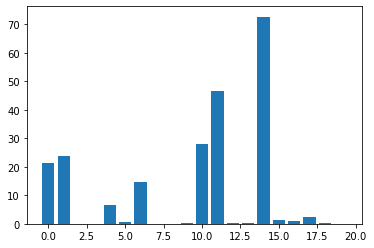

In [19]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### **So, good here as every thing matched and doubts are solved!!**

#### **`Case-1.2`**
##### **Selecting only top 4 features with SelectPercentile**

In [20]:
fs_p = SelectPercentile(score_func=f_regression,percentile=20)

### **F_Regression**

Univariate linear regression tests.

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure, not a free standing feature selection procedure.

This is done in 2 steps:

    The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).

    It is converted to an F score then to a p-value.


In [21]:
fs_p.fit(X,y)

SelectPercentile(percentile=20,
                 score_func=<function f_regression at 0x0000017B99FCEEA0>)

In [22]:
fs_selected_features = pd.DataFrame(fs_p.transform(X))
fs_selected_features.head()

,0,1,2,3
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [23]:
p_vals = np.round(pd.DataFrame(fs_p.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


In [24]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,-0.757330,0.021543,-0.382047,-0.424698,0.855161,0.479733,-1.309680,-1.415371,0.195509,-0.009777,-1.240460,1.324242,-1.350965,0.904078,-1.678382,-0.016301,-0.867185,0.037886,-0.048874,0.049301
1,-0.966334,1.186909,1.261429,-1.141514,-0.526693,1.447793,0.678977,-0.381230,0.150428,0.088908,-0.457351,-0.187372,-1.022263,-0.510489,0.386336,-1.206009,0.686917,0.694388,0.129252,1.071021
2,0.772737,1.009507,0.220113,0.916454,-0.205978,-0.126533,0.354027,0.323832,0.946846,-0.709392,-0.378839,-0.103924,-0.190398,0.935585,-0.295847,-1.932724,0.016026,0.282284,-2.206896,1.104021
3,0.402620,-0.788562,0.404699,0.245258,0.887943,1.033330,-0.187278,-0.376667,0.033746,-1.542179,-0.316086,-0.577650,-0.890086,1.746512,-0.126658,-1.177587,-1.548551,1.571223,-0.041350,1.896443
4,1.304134,-0.588450,0.740022,0.503271,-1.178247,0.741560,-1.866449,-1.285315,0.781163,0.518518,-1.034605,0.899639,-0.226777,1.046213,1.155840,0.554213,0.612315,-1.020462,0.102381,0.786904


In [25]:
loc = 1.0
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values == alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F1', 'F10', 'F11', 'F14']

#### **In the above cell, I have selected the `Level of Confidence` as 100% for testing purpose but we can select any threshold value. The only point here is that the higher this value the more relevant features are selected.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [26]:
## F-value or F-statstic calculated based on the linear regression test
np.round(fs_p.scores_,1)

array([21.2, 23.8,  0. ,  0.1,  6.5,  0.5, 14.5,  0. ,  0.1,  0.3, 28.1,
       46.6,  0.3,  0.4, 72.7,  1.5,  1.1,  2.3,  0.2,  0. ])

In [27]:
f_stats, p_vals = fs_p.score_func(X,y)

In [28]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21.229,23.785,0.014,0.079,6.474,0.515,14.521,0.001,0.068,0.308,28.116,46.645,0.338,0.414,72.681,1.451,1.148,2.299,0.217,0.011


#### **Here, if we see the test statistic value of features (F2, F6, F14 and F19) are extremely high as compared to others. Thus, we can say that these are the top 4 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [29]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


#### **P-values of features(F2, F6, F14 and F19) are also highly significant, also looking at the p-value of feature 5 suggests that it can be potentially the 5th best feature in this dataset.**

In [30]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F1,F10,F11,F14
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [31]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3
0,0.021543,-1.240460,1.324242,-1.678382
1,1.186909,-0.457351,-0.187372,0.386336
2,1.009507,-0.378839,-0.103924,-0.295847
3,-0.788562,-0.316086,-0.577650,-0.126658
4,-0.588450,-1.034605,0.899639,1.155840


In [32]:
for i in range(len(fs_p.scores_)):
    print('Feature %d: %f' % (i, fs_p.scores_[i]))

Feature 0: 21.229496
Feature 1: 23.784647
Feature 2: 0.013538
Feature 3: 0.079143
Feature 4: 6.474216
Feature 5: 0.514841
Feature 6: 14.521323
Feature 7: 0.001262
Feature 8: 0.068200
Feature 9: 0.308159
Feature 10: 28.115545
Feature 11: 46.644504
Feature 12: 0.338078
Feature 13: 0.413581
Feature 14: 72.681090
Feature 15: 1.451317
Feature 16: 1.147571
Feature 17: 2.298813
Feature 18: 0.217434
Feature 19: 0.010775


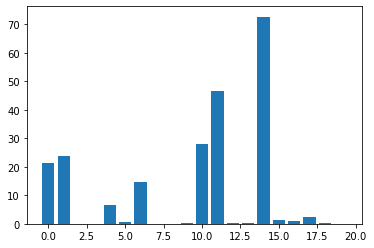

In [33]:
plt.bar([i for i in range(len(fs_p.scores_))], fs_p.scores_)
plt.show()

#### **So, good here as every thing matched and doubts are solved!!**

#### **`Case-2`**
##### **Selecting top 8 features instead of 4**

In [34]:
fs = SelectKBest(score_func=f_regression,k=8)

In [35]:
fs.fit(X,y)

SelectKBest(k=8, score_func=<function f_regression at 0x0000017B99FCEEA0>)

In [36]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3,4,5,6,7
0,-0.757330,0.021543,0.855161,-1.309680,-1.240460,1.324242,-1.678382,0.037886
1,-0.966334,1.186909,-0.526693,0.678977,-0.457351,-0.187372,0.386336,0.694388
2,0.772737,1.009507,-0.205978,0.354027,-0.378839,-0.103924,-0.295847,0.282284
3,0.402620,-0.788562,0.887943,-0.187278,-0.316086,-0.577650,-0.126658,1.571223
4,1.304134,-0.588450,-1.178247,-1.866449,-1.034605,0.899639,1.155840,-1.020462


In [37]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


In [38]:
loc = 0.99
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values < alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F0', 'F1', 'F6', 'F10', 'F11', 'F14']

#### **In the above cell, I have selected the `Level of Confidence` as 99% instead of 100% because I'm increasing the number of relevant features.**

#### **The `SelectKBest` works on the basis of selecting the top-k features with minimum p-vals or maximum F-statistic.**

In [39]:
## F-value or F-statstic calculated based on the linear regression test
fs.scores_   

array([2.12294955e+01, 2.37846473e+01, 1.35376692e-02, 7.91426159e-02,
       6.47421552e+00, 5.14840951e-01, 1.45213230e+01, 1.26248256e-03,
       6.82004057e-02, 3.08158552e-01, 2.81155449e+01, 4.66445040e+01,
       3.38078371e-01, 4.13581410e-01, 7.26810903e+01, 1.45131658e+00,
       1.14757136e+00, 2.29881269e+00, 2.17434217e-01, 1.07746934e-02])

In [40]:
f_stats, p_vals = fs.score_func(X,y)

In [41]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21.229,23.785,0.014,0.079,6.474,0.515,14.521,0.001,0.068,0.308,28.116,46.645,0.338,0.414,72.681,1.451,1.148,2.299,0.217,0.011


#### **Here, if we see the test statistic values of features (F2, F5, F6, F12, F14, F17 and F19) are high as compared to others. Thus, we can say that these are the top 7 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [42]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.00001,0.0,0.90749,0.77876,0.01171,0.4739,0.00018,0.97169,0.79425,0.57944,0.0,0.0,0.5616,0.5209,0.0,0.22975,0.28536,0.13107,0.64151,0.91743


#### **P-values of features(F2, F5, F6, F12, F14, F17 and F19) are also highly significant, also looking at the p-value of feature 0 suggests that it can be potentially the 8th best feature in this dataset.**

In [43]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F0,F1,F6,F10,F11,F14
0,-0.757330,0.021543,-1.309680,-1.240460,1.324242,-1.678382
1,-0.966334,1.186909,0.678977,-0.457351,-0.187372,0.386336
2,0.772737,1.009507,0.354027,-0.378839,-0.103924,-0.295847
3,0.402620,-0.788562,-0.187278,-0.316086,-0.577650,-0.126658
4,1.304134,-0.588450,-1.866449,-1.034605,0.899639,1.155840


In [44]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3,4,5,6,7
0,-0.757330,0.021543,0.855161,-1.309680,-1.240460,1.324242,-1.678382,0.037886
1,-0.966334,1.186909,-0.526693,0.678977,-0.457351,-0.187372,0.386336,0.694388
2,0.772737,1.009507,-0.205978,0.354027,-0.378839,-0.103924,-0.295847,0.282284
3,0.402620,-0.788562,0.887943,-0.187278,-0.316086,-0.577650,-0.126658,1.571223
4,1.304134,-0.588450,-1.178247,-1.866449,-1.034605,0.899639,1.155840,-1.020462


In [45]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 21.229496
Feature 1: 23.784647
Feature 2: 0.013538
Feature 3: 0.079143
Feature 4: 6.474216
Feature 5: 0.514841
Feature 6: 14.521323
Feature 7: 0.001262
Feature 8: 0.068200
Feature 9: 0.308159
Feature 10: 28.115545
Feature 11: 46.644504
Feature 12: 0.338078
Feature 13: 0.413581
Feature 14: 72.681090
Feature 15: 1.451317
Feature 16: 1.147571
Feature 17: 2.298813
Feature 18: 0.217434
Feature 19: 0.010775


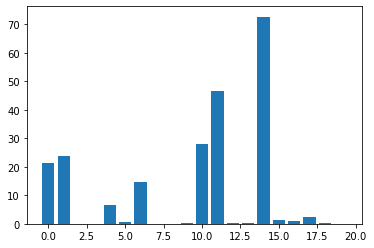

In [46]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### **So, good here as everything matched and doubts are solved!!**
##### **The point to remember here is that `SelectKBest` runs a `statistical test(passed as an input parameter)` at the backend and based on p-values or test statistics it filters the top dataset representing features.**

### **Classification_Problem**

In [47]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, mutual_info_regression

In [48]:
X, y = make_classification(n_samples=200,n_features=15,n_informative=6,n_classes=3)

In [49]:
X.shape, y.shape

((200, 15), (200,))

In [50]:
col_names = ['F'+str(val) for val in range(15)]
print(col_names)

X = pd.DataFrame(X,columns=col_names)

print(X.shape, y.shape)

['F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11', 'F12', 'F13', 'F14']
(200, 15) (200,)


In [51]:
X.head()

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,-1.633300,1.016406,-0.189386,1.426115,0.096179,0.802883,-0.159785,1.293646,0.177365,-0.618276,0.400505,-0.735850,-0.835703,0.475676,-0.613562
1,-0.049484,-0.696886,-0.692619,0.560343,-2.012127,1.428074,-2.981463,-0.802555,-0.296883,-1.837010,1.191489,1.564143,-2.155706,5.199760,-0.437216
2,-0.553081,-1.367262,-0.477987,-0.248202,1.950332,1.094778,-0.564143,1.100157,0.430692,1.701193,-1.194579,1.542500,-0.791687,-1.645150,1.808461
3,0.653160,2.562366,-0.323263,0.569652,1.122597,-0.264120,-3.957733,-1.574802,0.005325,-2.021926,1.930397,-1.527048,-0.804831,3.602211,-2.286931
4,-0.072112,0.474796,1.142193,-0.672265,-2.755381,2.564484,-1.155946,0.972140,-5.561348,0.851046,0.632174,0.944481,0.302508,9.163319,0.954114


In [52]:
np.unique(y), np.bincount(y), pd.DataFrame(y).head()

(array([0, 1, 2]),
 array([67, 67, 66], dtype=int64),
    0
 0  2
 1  1
 2  1
 3  1
 4  0)

#### **`Case:1`**
##### **Selecting only top 5 features**

In [53]:
fs = SelectKBest(score_func=f_classif,k=5)

### **F_Classif**

Compute the ANOVA F-value for the provided sample.

In [54]:
fs.fit(X,y)

SelectKBest(k=5)

In [55]:
fs_selected_features = pd.DataFrame(fs.transform(X))
fs_selected_features.head()

,0,1,2,3,4
0,1.016406,0.096179,0.177365,-0.618276,0.475676
1,-0.696886,-2.012127,-0.296883,-1.837010,5.199760
2,-1.367262,1.950332,0.430692,1.701193,-1.645150
3,2.562366,1.122597,0.005325,-2.021926,3.602211
4,0.474796,-2.755381,-5.561348,0.851046,9.163319


In [56]:
p_vals = np.round(pd.DataFrame(fs.pvalues_).T,5)
p_vals.columns = col_names

p_vals

,F0,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14
0,0.18937,0.0,0.9958,0.98223,0.0,0.81365,0.00004,0.358,0.0,0.0,0.25867,0.29571,0.02015,0.0,0.81619


In [57]:
loc = 0.99
alpha = 1 - loc

manual_selected_cols = []
for feature in col_names:
    if p_vals[feature].values < alpha:
        manual_selected_cols.append(feature)

manual_selected_cols

['F1', 'F4', 'F6', 'F8', 'F9', 'F13']

#### **In the above cell, I have selected the `Level of Confidence` as 99% and based on it top-5 features are printed.**

In [58]:
## F-value or F-statstic calculated based on the linear regression test
fs.scores_   

array([1.67820234e+00, 2.58471518e+01, 4.21392814e-03, 1.79297328e-02,
       3.28233847e+01, 2.06439470e-01, 1.06328306e+01, 1.03260193e+00,
       3.51461069e+01, 1.34247743e+01, 1.36151650e+00, 1.22595011e+00,
       3.98311382e+00, 2.09636010e+01, 2.03313621e-01])

In [59]:
f_stats, p_vals = fs.score_func(X,y)

In [60]:
pd.DataFrame(np.round(f_stats,3)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,1.678,25.847,0.004,0.018,32.823,0.206,10.633,1.033,35.146,13.425,1.362,1.226,3.983,20.964,0.203


#### **Here, if we see the test statistic values of features (F8, F14, F9, F10, and F12) are high as compared to others. Thus, we can say that these are the top 5 features who are rejecting the null hypothesis i.e. no linear relation exists.**

In [61]:
pd.DataFrame(np.round(p_vals,5)).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.18937,0.0,0.9958,0.98223,0.0,0.81365,0.00004,0.358,0.0,0.0,0.25867,0.29571,0.02015,0.0,0.81619


#### **P-values of features(F8, F14, F9, F10, and F12) are also highly significant.**

In [62]:
## Manually selected top-4 features based on self provided alpha value
X[manual_selected_cols].head()

,F1,F4,F6,F8,F9,F13
0,1.016406,0.096179,-0.159785,0.177365,-0.618276,0.475676
1,-0.696886,-2.012127,-2.981463,-0.296883,-1.837010,5.199760
2,-1.367262,1.950332,-0.564143,0.430692,1.701193,-1.645150
3,2.562366,1.122597,-3.957733,0.005325,-2.021926,3.602211
4,0.474796,-2.755381,-1.155946,-5.561348,0.851046,9.163319


In [63]:
## Features returned by SelectKBest
fs_selected_features.head()

,0,1,2,3,4
0,1.016406,0.096179,0.177365,-0.618276,0.475676
1,-0.696886,-2.012127,-0.296883,-1.837010,5.199760
2,-1.367262,1.950332,0.430692,1.701193,-1.645150
3,2.562366,1.122597,0.005325,-2.021926,3.602211
4,0.474796,-2.755381,-5.561348,0.851046,9.163319


In [64]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 1.678202
Feature 1: 25.847152
Feature 2: 0.004214
Feature 3: 0.017930
Feature 4: 32.823385
Feature 5: 0.206439
Feature 6: 10.632831
Feature 7: 1.032602
Feature 8: 35.146107
Feature 9: 13.424774
Feature 10: 1.361516
Feature 11: 1.225950
Feature 12: 3.983114
Feature 13: 20.963601
Feature 14: 0.203314


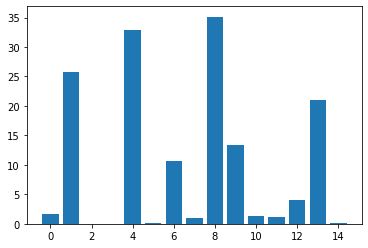

In [65]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### **So, good here as every thing matched and doubts are solved!!**

#### **`Case:2`**
##### **Only `Categorical` Explanatory Variables :: Selecting only top 5 features**

In [66]:
import scipy.io.arff as arff
import os

In [67]:
path = os.getcwd()
file = path + '\\Autism-Child-Data.arff'
print(file)

E:\STUDY\PROJECTS\AAIC_Practice\MODULES\Module_3\Mod_3_Feature_Encoding\Autism-Child-Data.arff


In [68]:
arff.loadarff(file)[1]

Dataset: child
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('m', 'f')
	ethnicity's type is nominal, range is ('Others', 'Middle Eastern ', 'White-European', 'Black', 'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish', 'Latino')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('Jordan', 'United States', 'Egypt', 'United Kingdom', 'Bahrain', 'Austria', 'Kuwait', 'United Arab Emirates', 'Eur

In [69]:
def apply_decode(df_name):
    """
    Description: Function created for changing the character encoding
    
    Input: It accepts one parameter:
        df_name : `Pandas DataFrame`
    
    Return: `utf-8` encoded DataFrame
    """
    for col in df_name.columns:
        if df_name[col].dtype != 'float64':
            df_name[col] = df_name[col].apply(lambda val : val.decode('utf-8'))
    pd.set_option('display.max_columns',50)
    return df_name

In [70]:
autism_dataset = pd.DataFrame(arff.loadarff(file)[0])
autism_dataset.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'


In [71]:
autism_df = apply_decode(autism_dataset)

In [72]:
autism_df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,6.0,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,6.0,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,5.0,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,5.0,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES


In [73]:
X_category_data = autism_df[['ethnicity', 'contry_of_res', 'relation']].copy(deep=True)
X_category_data.head()

,ethnicity,contry_of_res,relation
0,Others,Jordan,Parent
1,Middle Eastern,Jordan,Parent
2,?,Jordan,?
3,?,Jordan,?
4,Others,United States,Parent


In [74]:
X_category_data = X_category_data.applymap(lambda val: None if val == '?' else val)

In [75]:
X_category_data.isnull().sum()

ethnicity        43
contry_of_res     0
relation         43
dtype: int64

In [76]:
X_category_data['ethnicity'].value_counts()

White-European     108
Asian               46
Middle Eastern      27
South Asian         21
Black               14
Others              14
Latino               8
Hispanic             7
Turkish              2
Pasifika             2
Name: ethnicity, dtype: int64

In [77]:
X_category_data['relation'].value_counts()

Parent                      214
Relative                     17
Health care professional     13
Self                          4
self                          1
Name: relation, dtype: int64

In [78]:
X_category_data['ethnicity'].fillna(value='White-European',axis=0,inplace=True)
X_category_data['relation'].fillna(value='Parent',axis=0,inplace=True)

In [79]:
X_category_data.isnull().sum()

ethnicity        0
contry_of_res    0
relation         0
dtype: int64

In [80]:
X_category_data.head()

,ethnicity,contry_of_res,relation
0,Others,Jordan,Parent
1,Middle Eastern,Jordan,Parent
2,White-European,Jordan,Parent
3,White-European,Jordan,Parent
4,Others,United States,Parent


In [81]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

#### **Diff_b/w_LE_and_OE**

1. Both of these techniques performs the same function, as they do the numerical encoding on categorical data. Point to note that Ordinal Encoder sounds like it performs Ordinal numerical encoding on the data but it also fails to perform the semantic ordinal encoding.
    - For example; hot, cold, warm are labelled as cold,hot,warm by both the techniques whereas these should be labelled as cold<warm<hot.
    - We need to provide the explicit linking in order to perfrom semantic ordinal encoding.


2. Scikit learn has these 2 implementations for same task because Label Encoder is created for applying encoding of Target Variable and Ordinal Encoder for features.
    - Because, 
        - LabelEncoder learns classes_
        - OrdinalEncoder learns categories_
    - And,
        - LabelEncoder expects 1D array i.e. Target Variable
        - OrdinalEncoder expects 2D array i.e. Features

In [82]:
le = LabelEncoder()
oe = OrdinalEncoder()

In [83]:
le.fit(X_category_data['ethnicity'])

LabelEncoder()

In [84]:
le.classes_

array(['Asian', 'Black', 'Hispanic', 'Latino', 'Middle Eastern ',
       'Others', 'Pasifika', 'South Asian', 'Turkish', 'White-European'],
      dtype=object)

#### **The above list of various categories are in the sequence of lables assigned to each category.**
- **For example, 'Asian' -- 0, 'Black -- 1, 'Hispanic' -- 2 .... so on.**

In [85]:
X_category_data['ethnicity'] = le.transform(X_category_data['ethnicity'])
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,Jordan,Parent
1,4,Jordan,Parent
2,9,Jordan,Parent
3,9,Jordan,Parent
4,5,United States,Parent


In [86]:
cntry_le = LabelEncoder()
cntry_le.fit(X_category_data['contry_of_res'])

LabelEncoder()

In [87]:
cntry_le.classes_

array(['Afghanistan', 'Argentina', 'Armenia', 'Australia', 'Austria',
       'Bahrain', 'Bangladesh', 'Bhutan', 'Brazil', 'Bulgaria', 'Canada',
       'China', 'Costa Rica', 'Egypt', 'Europe', 'Georgia', 'Germany',
       'Ghana', 'India', 'Iraq', 'Ireland', 'Isle of Man', 'Italy',
       'Japan', 'Jordan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya',
       'Malaysia', 'Malta', 'Mexico', 'Nepal', 'Netherlands',
       'New Zealand', 'Nigeria', 'Oman', 'Pakistan', 'Philippines',
       'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'South Africa',
       'South Korea', 'Sweden', 'Syria', 'Turkey',
       'U.S. Outlying Islands', 'United Arab Emirates', 'United Kingdom',
       'United States'], dtype=object)

In [88]:
X_category_data['contry_of_res'] = cntry_le.transform(X_category_data['contry_of_res'])
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,24,Parent
1,4,24,Parent
2,9,24,Parent
3,9,24,Parent
4,5,51,Parent


In [89]:
X_category_data['relation'] = X_category_data['relation'].apply(lambda val: str(val).capitalize())
X_category_data['relation'].value_counts()

Parent                      257
Relative                     17
Health care professional     13
Self                          5
Name: relation, dtype: int64

In [90]:
oe.fit(X_category_data[['relation']])

OrdinalEncoder()

In [91]:
oe.categories_

[array(['Health care professional', 'Parent', 'Relative', 'Self'],
       dtype=object)]

In [92]:
X_category_data['relation'] = pd.DataFrame(oe.transform(X_category_data[['relation']]))
X_category_data.head()

,ethnicity,contry_of_res,relation
0,5,24,1.0
1,4,24,1.0
2,9,24,1.0
3,9,24,1.0
4,5,51,1.0


In [93]:
pred_dict = {'NO':0,'YES':1}
y_cat_data = autism_df['Class/ASD']
y_cat_data = y_cat_data.apply(lambda val: pred_dict.get(val))

In [94]:
X_category_data.shape, y_cat_data.shape

((292, 3), (292,))

In [95]:
fs = SelectKBest(score_func=mutual_info_classif,k=1)

### **Mutual_info_classif**

- Estimate mutual information for a discrete target variable.

- Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

- The term “discrete features” is used instead of naming them “categorical”, because it describes the essence more accurately.  For example, pixel intensities of an image are discrete features (but hardly categorical) and you will get better results if mark them as such. Also note, that treating a continuous variable as discrete and vice versa will usually give incorrect results, so be attentive about that.

- True mutual information can’t be negative. If its estimate turns out to be negative, it is replaced by zero.

In [96]:
fs.fit(X_category_data,y_cat_data)

SelectKBest(k=1,
            score_func=<function mutual_info_classif at 0x0000017B9A35E268>)

In [97]:
fs.scores_

array([0.01350759, 0.06914943, 0.07706504])

In [98]:
fs.score_func(X_category_data,y_cat_data)

array([0.00841553, 0.0201096 , 0.        ])

In [99]:
pd.DataFrame(fs.transform(X_category_data)).head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [100]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.013508
Feature 1: 0.069149
Feature 2: 0.077065


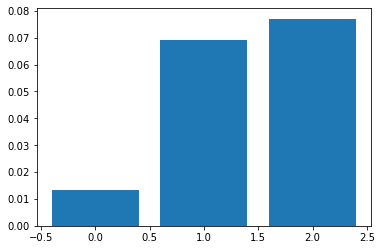

In [101]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### **Feature with maximum MI score is selected as the relevant feature.**

#### **`Case:3`**
##### **`Categorical` Explanatory & Target Variables**

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [103]:
cat_data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv',header=None)

In [104]:
X = cat_data.iloc[:,0:-1].copy(deep=True)
y = cat_data.iloc[:,-1].copy(deep=True)

In [105]:
X.shape, y.shape

((286, 9), (286,))

In [106]:
X.isnull().sum()

0    0
1    0
2    0
3    0
4    8
5    0
6    0
7    1
8    0
dtype: int64

In [107]:
si = SimpleImputer(strategy='most_frequent')

In [108]:
X[4] = pd.DataFrame(si.fit_transform(X[[4]]))

In [109]:
X[7] = pd.DataFrame(si.fit_transform(X[[7]]))

In [110]:
X.head(), y.head()

(         0          1        2      3      4    5        6           7      8
 0  '40-49'  'premeno'  '15-19'  '0-2'  'yes'  '3'  'right'   'left_up'   'no'
 1  '50-59'     'ge40'  '15-19'  '0-2'   'no'  '1'  'right'   'central'   'no'
 2  '50-59'     'ge40'  '35-39'  '0-2'   'no'  '2'   'left'  'left_low'   'no'
 3  '40-49'  'premeno'  '35-39'  '0-2'  'yes'  '3'  'right'  'left_low'  'yes'
 4  '40-49'  'premeno'  '30-34'  '3-5'  'yes'  '2'   'left'  'right_up'   'no',
 0       'recurrence-events'
 1    'no-recurrence-events'
 2       'recurrence-events'
 3    'no-recurrence-events'
 4       'recurrence-events'
 Name: 9, dtype: object)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=33,stratify=y)

In [112]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185, 9), (101, 9), (185,), (101,))

In [113]:
oe = OrdinalEncoder()
le = LabelEncoder()

In [114]:
oe.fit(X_train)
le.fit(y_train)

LabelEncoder()

In [115]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)

y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((185, 9), (101, 9), (185,), (101,))

In [117]:
fs = SelectKBest(score_func=chi2,k='all')

In [118]:
fs.fit(X_train,y_train)

SelectKBest(k='all', score_func=<function chi2 at 0x0000017B99FCED08>)

In [119]:
pd.DataFrame(fs.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
2,3.0,2.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3.0,0.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0


In [120]:
pd.DataFrame(fs.transform(X_test)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2.0,2.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
3,2.0,2.0,6.0,6.0,1.0,1.0,1.0,4.0,1.0
4,3.0,2.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0


In [121]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.004460
Feature 1: 0.043274
Feature 2: 4.807863
Feature 3: 61.981838
Feature 4: 10.479021
Feature 5: 6.011364
Feature 6: 0.294110
Feature 7: 1.365009
Feature 8: 9.455277


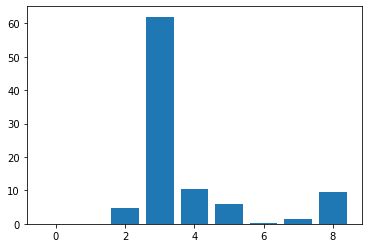

In [122]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

#### **`Case:3.1`**
##### **With Mutual Information Scoring Function**

In [123]:
fs = SelectKBest(score_func=mutual_info_classif,k='all')

In [124]:
fs.fit(X_train,y_train)

SelectKBest(k='all',
            score_func=<function mutual_info_classif at 0x0000017B9A35E268>)

In [125]:
pd.DataFrame(fs.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,7.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2.0,0.0,3.0,0.0,0.0,2.0,0.0,1.0,0.0
2,3.0,2.0,5.0,0.0,0.0,2.0,0.0,1.0,0.0
3,3.0,0.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
4,2.0,2.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0


In [126]:
pd.DataFrame(fs.transform(X_test)).head()

,0,1,2,3,4,5,6,7,8
0,3.0,0.0,5.0,0.0,0.0,0.0,0.0,2.0,0.0
1,3.0,1.0,3.0,0.0,0.0,0.0,0.0,2.0,0.0
2,2.0,2.0,4.0,0.0,0.0,2.0,0.0,4.0,0.0
3,2.0,2.0,6.0,6.0,1.0,1.0,1.0,4.0,1.0
4,3.0,2.0,4.0,0.0,0.0,0.0,1.0,2.0,0.0


In [127]:
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.076694
Feature 1: 0.000000
Feature 2: 0.013526
Feature 3: 0.037180
Feature 4: 0.106637
Feature 5: 0.109097
Feature 6: 0.000000
Feature 7: 0.000000
Feature 8: 0.052100


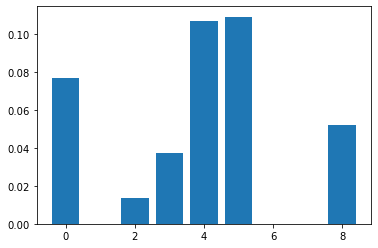

In [128]:
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [130]:
X_train

array([[3., 0., 7., ..., 0., 1., 0.],
       [2., 0., 3., ..., 0., 1., 0.],
       [3., 2., 5., ..., 0., 1., 0.],
       ...,
       [2., 0., 5., ..., 0., 2., 1.],
       [4., 0., 4., ..., 1., 4., 0.],
       [3., 2., 4., ..., 1., 1., 1.]])

### **Feature_Forward_Selection**

In [131]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [141]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [132]:
dt = DecisionTreeClassifier()

In [134]:
ffs = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10)

In [135]:
ffs.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s finished
Features: 3/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 4/4

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          k_features=4, scoring='accuracy', verbose=1)

In [142]:
ffs.k_feature_names_, ffs.k_feature_idx_, ffs.k_features, ffs.k_score_, ffs.subsets_

(('0', '3', '4', '5'),
 (0, 3, 4, 5),
 4,
 0.7342105263157895,
 {1: {'feature_idx': (0,),
   'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
          0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
   'avg_score': 0.703216374269006,
   'feature_names': ('0',)},
  2: {'feature_idx': (0, 4),
   'cv_scores': array([0.73684211, 0.68421053, 0.68421053, 0.78947368, 0.68421053,
          0.72222222, 0.77777778, 0.61111111, 0.77777778, 0.66666667]),
   'avg_score': 0.7134502923976609,
   'feature_names': ('0', '4')},
  3: {'feature_idx': (0, 4, 5),
   'cv_scores': array([0.73684211, 0.57894737, 0.78947368, 0.78947368, 0.68421053,
          0.61111111, 0.77777778, 0.83333333, 0.83333333, 0.61111111]),
   'avg_score': 0.724561403508772,
   'feature_names': ('0', '4', '5')},
  4: {'feature_idx': (0, 3, 4, 5),
   'cv_scores': array([0.78947368, 0.63157895, 0.84210526, 0.78947368, 0.78947368,
          0.61111111, 0.77777778, 0.77777778, 0.72222222, 0.

In [143]:
ffs.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
         0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
  'avg_score': 0.703216374269006,
  'feature_names': ('0',),
  'ci_bound': 0.014115889413033223,
  'std_dev': 0.01900584795321636,
  'std_err': 0.006335282651072119},
 2: {'feature_idx': (0, 4),
  'cv_scores': array([0.73684211, 0.68421053, 0.68421053, 0.78947368, 0.68421053,
         0.72222222, 0.77777778, 0.61111111, 0.77777778, 0.66666667]),
  'avg_score': 0.7134502923976609,
  'feature_names': ('0', '4'),
  'ci_bound': 0.0406167147817032,
  'std_dev': 0.054686961828098415,
  'std_err': 0.018228987276032803},
 3: {'feature_idx': (0, 4, 5),
  'cv_scores': array([0.73684211, 0.57894737, 0.78947368, 0.78947368, 0.68421053,
         0.61111111, 0.77777778, 0.83333333, 0.83333333, 0.61111111]),
  'avg_score': 0.724561403508772,
  'feature_names': ('0', '4', '5'),
  'ci_bound': 0.06792728161477092,
  'std_dev': 

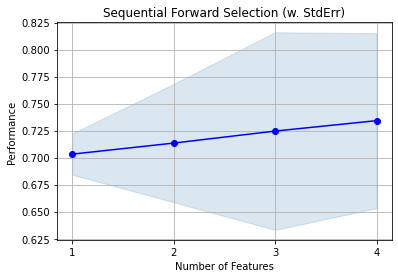

In [148]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(ffs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

### **Backward_Elimination**

In [149]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [150]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [151]:
dt = DecisionTreeClassifier()

In [152]:
be = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10,forward=False,floating=False)

In [153]:
be.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.5s finished
Features: 8/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished
Features: 7/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.5s finished
Features: 6/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s finished
Features: 5/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
Features: 4/4

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          forward=False, k_features=4, scoring='accuracy',
                          verbose=1)

In [154]:
be.k_feature_names_, be.k_feature_idx_, be.k_features, be.k_score_, be.subsets_

(('0', '1', '4', '6'),
 (0, 1, 4, 6),
 4,
 0.7508771929824561,
 {9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
   'cv_scores': array([0.57894737, 0.42105263, 0.68421053, 0.52631579, 0.63157895,
          0.5       , 0.55555556, 0.55555556, 0.61111111, 0.38888889]),
   'avg_score': 0.5453216374269007,
   'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8')},
  8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8),
   'cv_scores': array([0.78947368, 0.36842105, 0.78947368, 0.63157895, 0.73684211,
          0.5       , 0.72222222, 0.61111111, 0.66666667, 0.66666667]),
   'avg_score': 0.6482456140350878,
   'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8')},
  7: {'feature_idx': (0, 1, 2, 3, 4, 6, 8),
   'cv_scores': array([0.84210526, 0.73684211, 0.84210526, 0.68421053, 0.78947368,
          0.61111111, 0.66666667, 0.66666667, 0.77777778, 0.72222222]),
   'avg_score': 0.7339181286549707,
   'feature_names': ('0', '1', '2', '3', '4', '6', '8')},
  6: {'feature_idx': (0, 1, 2, 4, 

In [155]:
be.get_metric_dict()

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8),
  'cv_scores': array([0.57894737, 0.42105263, 0.68421053, 0.52631579, 0.63157895,
         0.5       , 0.55555556, 0.55555556, 0.61111111, 0.38888889]),
  'avg_score': 0.5453216374269007,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6', '7', '8'),
  'ci_bound': 0.06420413943845679,
  'std_dev': 0.08644542872429625,
  'std_err': 0.02881514290809875},
 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 8),
  'cv_scores': array([0.78947368, 0.36842105, 0.78947368, 0.63157895, 0.73684211,
         0.5       , 0.72222222, 0.61111111, 0.66666667, 0.66666667]),
  'avg_score': 0.6482456140350878,
  'feature_names': ('0', '1', '2', '3', '4', '5', '6', '8'),
  'ci_bound': 0.09271324142647652,
  'std_dev': 0.12483051674905507,
  'std_err': 0.04161017224968502},
 7: {'feature_idx': (0, 1, 2, 3, 4, 6, 8),
  'cv_scores': array([0.84210526, 0.73684211, 0.84210526, 0.68421053, 0.78947368,
         0.61111111, 0.66666667, 0.66666667, 0.77777778, 0.72222222])

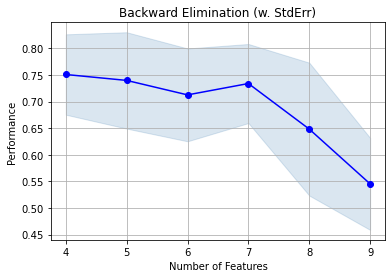

In [157]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(be.get_metric_dict(), kind='std_dev')
plt.title('Backward Elimination (w. StdErr)')
plt.grid()
plt.show()

### **Bi-Directional_Elimination**
##### **Also known as Step-wise Selection**

In [158]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier

In [159]:
X_train.shape, y_train.shape

((185, 9), (185,))

In [160]:
dt = DecisionTreeClassifier()

In [162]:
bde = SFS(estimator=dt,k_features=4,verbose=1,scoring='accuracy',cv=10,forward=True,floating=True)

In [163]:
bde.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.4s finished
Features: 1/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
Features: 2/4[Parallel(n_jobs=1)]: Using backend SequentialBackend w

SequentialFeatureSelector(cv=10, estimator=DecisionTreeClassifier(),
                          floating=True, k_features=4, scoring='accuracy',
                          verbose=1)

In [164]:
bde.k_feature_names_, bde.k_feature_idx_, bde.k_features, bde.k_score_, bde.subsets_

(('1', '3', '4', '5'),
 (1, 3, 4, 5),
 4,
 0.7403508771929824,
 {1: {'feature_idx': (0,),
   'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
          0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
   'avg_score': 0.703216374269006,
   'feature_names': ('0',)},
  2: {'feature_idx': (4, 5),
   'cv_scores': array([0.84210526, 0.68421053, 0.78947368, 0.84210526, 0.63157895,
          0.66666667, 0.72222222, 0.83333333, 0.83333333, 0.66666667]),
   'avg_score': 0.7511695906432749,
   'feature_names': ('4', '5')},
  3: {'feature_idx': (3, 4, 5),
   'cv_scores': array([0.89473684, 0.73684211, 0.84210526, 0.84210526, 0.73684211,
          0.66666667, 0.77777778, 0.83333333, 0.66666667, 0.66666667]),
   'avg_score': 0.766374269005848,
   'feature_names': ('3', '4', '5')},
  4: {'feature_idx': (1, 3, 4, 5),
   'cv_scores': array([0.89473684, 0.68421053, 0.84210526, 0.63157895, 0.68421053,
          0.66666667, 0.77777778, 0.72222222, 0.77777778, 0.

In [165]:
bde.get_metric_dict()

{1: {'feature_idx': (0,),
  'cv_scores': array([0.68421053, 0.68421053, 0.68421053, 0.68421053, 0.68421053,
         0.72222222, 0.72222222, 0.72222222, 0.72222222, 0.72222222]),
  'avg_score': 0.703216374269006,
  'feature_names': ('0',),
  'ci_bound': 0.014115889413033223,
  'std_dev': 0.01900584795321636,
  'std_err': 0.006335282651072119},
 2: {'feature_idx': (4, 5),
  'cv_scores': array([0.84210526, 0.68421053, 0.78947368, 0.84210526, 0.63157895,
         0.66666667, 0.72222222, 0.83333333, 0.83333333, 0.66666667]),
  'avg_score': 0.7511695906432749,
  'feature_names': ('4', '5'),
  'ci_bound': 0.06006910393311974,
  'std_dev': 0.08087795410076846,
  'std_err': 0.026959318033589485},
 3: {'feature_idx': (3, 4, 5),
  'cv_scores': array([0.89473684, 0.73684211, 0.84210526, 0.84210526, 0.73684211,
         0.66666667, 0.77777778, 0.83333333, 0.66666667, 0.66666667]),
  'avg_score': 0.766374269005848,
  'feature_names': ('3', '4', '5'),
  'ci_bound': 0.05947734563318215,
  'std_dev': 

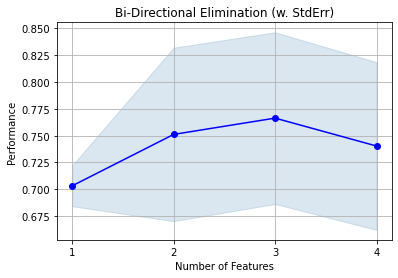

In [166]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(bde.get_metric_dict(), kind='std_dev')
plt.title('Bi-Directional Elimination (w. StdErr)')
plt.grid()
plt.show()